In [10]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt

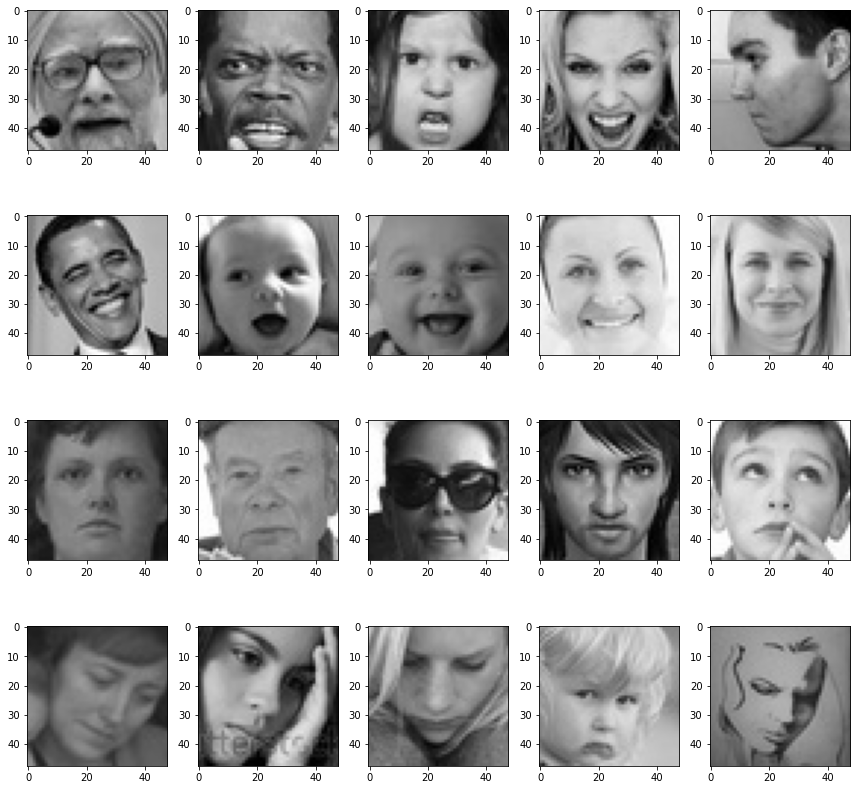

In [5]:
pic_size = 48

# input path for the images
base_path = "images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()


In [8]:
batch_size = 128
base_path = "images/"


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 21077 images belonging to 4 classes.
Found 5140 images belonging to 4 classes.


In [14]:
nb_classes = 4

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 56, 56, 64)        640       
_________________________________________________________________
batch_normalization_18 (Batc (None, 56, 56, 64)        256       
_________________________________________________________________
activation_18 (Activation)   (None, 56, 56, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 128)       204928    
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 128)      

In [16]:
epochs = 50

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
164/164 [==============================] - ETA: 0s - loss: 1.5574 - accuracy: 0.3000
Epoch 00001: val_accuracy improved from -inf to 0.23750, saving model to model_weights.h5
164/164 [==============================] - 1468s 9s/step - loss: 1.5574 - accuracy: 0.3000 - val_loss: 1.3953 - val_accuracy: 0.2375
Epoch 2/50
164/164 [==============================] - ETA: 0s - loss: 1.4722 - accuracy: 0.3275
Epoch 00002: val_accuracy improved from 0.23750 to 0.24102, saving model to model_weights.h5
164/164 [==============================] - 1499s 9s/step - loss: 1.4722 - accuracy: 0.3275 - val_loss: 1.4006 - val_accuracy: 0.2410
Epoch 3/50
164/164 [==============================] - ETA: 0s - loss: 1.4444 - accuracy: 0.3365 
Epoch 00003: val_accuracy improved from 0.24102 to 0.24160, saving model to model_weights.h5
164/164 [==============================] - 1748s 11s/step - loss: 1.4444 - accuracy: 0.3365 - val_loss: 1.4374 - val_accuracy: 0.2416
Epoch 4/50
164/164 [===============

In [11]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [12]:
from tensorflow.keras.models import load_model
model = load_model('model3.h5')


In [37]:
import copy
img = cv2.imread('neutral2.jpg')
img = copy.deepcopy(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 2, 5)
for (x,y,w,h) in faces:
    fc = gray[y:y+h, x:x+w]
    roi = cv2.resize(fc, (48,48))
    pred = model.predict(roi[np.newaxis, :, :, np.newaxis])
    text_idx=np.argmax(pred)
    text_list = ['Angry','Happy', 'Neutral', 'Sad']
    print(text_idx)
    print(pred)
    if text_idx == 0:
        text= text_list[0]
    if text_idx == 1:
        text= text_list[1]
    elif text_idx == 2:
        text= text_list[2]
    elif text_idx == 3:
        text= text_list[3]
    cv2.putText(img, text, (x, y-5),
    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.imshow("frame", img)
    key = cv2.waitKey(1) & 0xFF
    if key== ord('q'):
        break
    

cv2.destroyAllWindows()


0
[[1. 0. 0. 0.]]


In [38]:
cv2.imshow("frame",img)

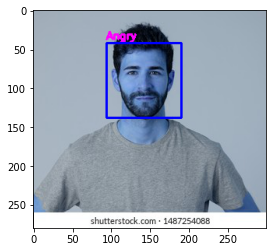

In [39]:
imgplot = plt.imshow(img)
plt.show()

In [30]:
img = cv2.imread('happy.jpg')
img = cv2.resize(img, (48,48))


In [31]:
model.predict(img)

ValueError: in user code:

    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\dell ttc\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 48, 3]
